In [ ]:
import pandas as pd
import pandas
from pandas_profiling import profileReport

In [ ]:
from pandas_profiling import ProfileReport


###Reading Data

In [ ]:

file=pd.read_csv("F:\\abc.csv")

In [ ]:
profile=ProfileReport(file)

In [ ]:
profile.to_file("test.html")

Export report to file: 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]


#Handling Missing

In [ ]:
file.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
Sex            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
file[file["Group"]=="Demented"]["MMSE"].mean()

24.51388888888889

In [ ]:
file[file["Group"]=="Demented"]["MMSE"].median()

26.0

In [ ]:
file["MMSE"] = file.MMSE.fillna(file[file["Group"] == "Demented"]["MMSE"].median())

In [ ]:
def fill_ses(x):
    ses=0
    if x >17:
        ses=1
    elif (x<17) and (x>15):
        ses=2
    elif (x<15) and (x>13):
        ses=3
    elif (x<13) and (x>11):
        ses=4
    else:
        ses:5
    return ses 

In [ ]:
file["SES"]=file.apply(lambda x: fill_ses(x.EDUC) if pd.isna(x.SES) else x.SES, axis=1)

In [ ]:
file.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
Sex           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

#Handling cotegorical 

In [ ]:
groupmap={"Demented":1,"Nondemented":0,"Converted":1}

In [ ]:
file['Group']=file['Group'].map(groupmap)

In [ ]:
file.groupby('Group').nunique()

,Subject ID,MRI ID,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,,,,,,,,,,,,,,
0,72,190,5,116,2,1,37,11,5,5,2,164,105,163
1,78,183,5,98,2,1,33,11,5,18,4,152,95,145


In [ ]:
file['Sex']=file['Sex'].replace(['F','M'],[0,1])

In [ ]:
file.groupby('Sex').nunique()

,Subject ID,MRI ID,Group,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Sex,,,,,,,,,,,,,,
0,88,213,2,5,122,1,39,10,5,15,4,174,106,169
1,62,160,2,5,94,1,32,11,4,17,4,136,94,133


Corrlation 

In [ ]:
corr=file.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15692\4016576769.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=file.corr()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<AxesSubplot: >

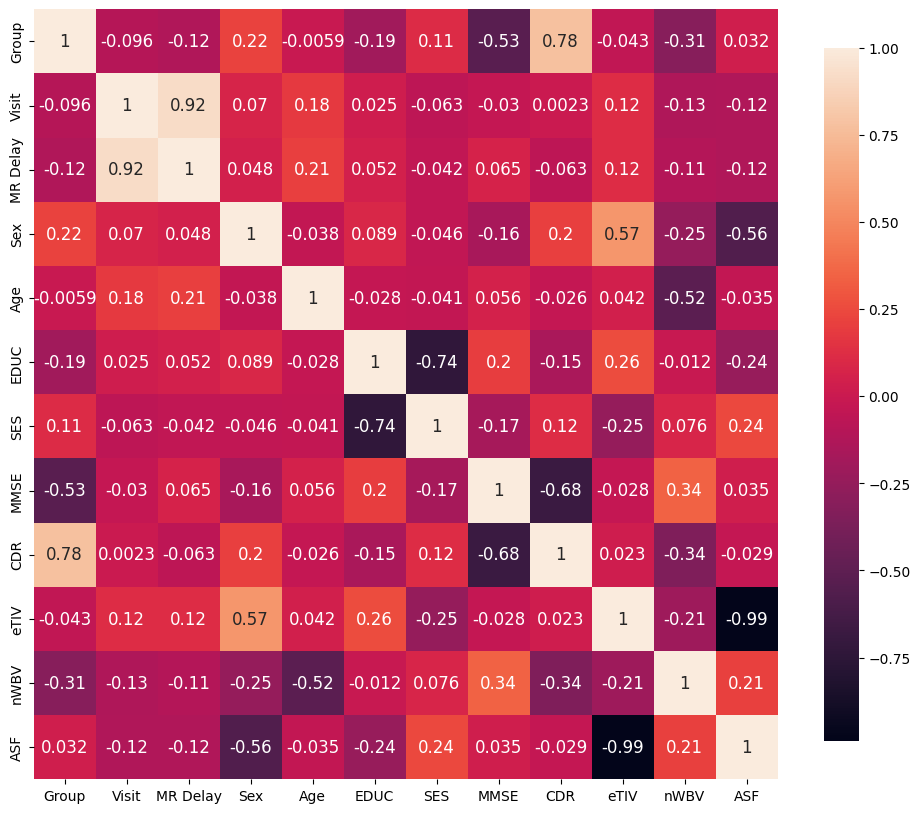

In [ ]:

ax = plt.subplots( figsize =( 12 , 10 ) )
sns.heatmap(corr,cbar_kws={ 'shrink' : .9 },annot = True, annot_kws = { 'fontsize' : 12 })

Spiliting Data

In [ ]:
subjectid=file['Subject ID']
file.drop(['Subject ID'],axis=1,inplace=True)

In [ ]:
y=file['Group']
x=file.drop(['Group'],axis=1)

In [ ]:
x.drop(["Hand", "MRI ID"], axis = 1, inplace = True)

In [ ]:
x.head()

,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,1,75,12,4.0,23.0,0.5,1678,0.736,1.046
3,2,560,1,76,12,4.0,28.0,0.5,1738,0.713,1.010
4,3,1895,1,80,12,4.0,22.0,0.5,1698,0.701,1.034


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=13)

Scale Data 

In [ ]:
delay_scaler = MinMaxScaler()
age_scaler = MinMaxScaler()
educ_scaler = MinMaxScaler()
mmse_scaler = MinMaxScaler()
etiv_scaler = MinMaxScaler()

delay_scaler.fit(x_train["MR Delay"].to_numpy().reshape(-1,1))
age_scaler.fit(x_train["Age"].to_numpy().reshape(-1,1))
educ_scaler.fit(x_train["EDUC"].to_numpy().reshape(-1,1))
mmse_scaler.fit(x_train["MMSE"].to_numpy().reshape(-1,1))
etiv_scaler.fit(x_train["eTIV"].to_numpy().reshape(-1,1))

x_train["MR Delay"] = delay_scaler.transform(x_train["MR Delay"].to_numpy().reshape(-1,1))
x_train["Age"] = age_scaler.transform(x_train["Age"].to_numpy().reshape(-1,1))
x_train["EDUC"] = educ_scaler.transform(x_train["EDUC"].to_numpy().reshape(-1,1))
x_train["MMSE"] = mmse_scaler.transform(x_train["MMSE"].to_numpy().reshape(-1,1))
x_train["eTIV"] = etiv_scaler.transform(x_train["eTIV"].to_numpy().reshape(-1,1))

x_test["MR Delay"] = delay_scaler.transform(x_test["MR Delay"].to_numpy().reshape(-1,1))
x_test["Age"] = age_scaler.transform(x_test["Age"].to_numpy().reshape(-1,1))
x_test["EDUC"] = educ_scaler.transform(x_test["EDUC"].to_numpy().reshape(-1,1))
x_test["MMSE"] = mmse_scaler.transform(x_test["MMSE"].to_numpy().reshape(-1,1))
x_test["eTIV"] = etiv_scaler.transform(x_test["eTIV"].to_numpy().reshape(-1,1))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,f1_score,ConfusionMatrixDisplay